# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("data/wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


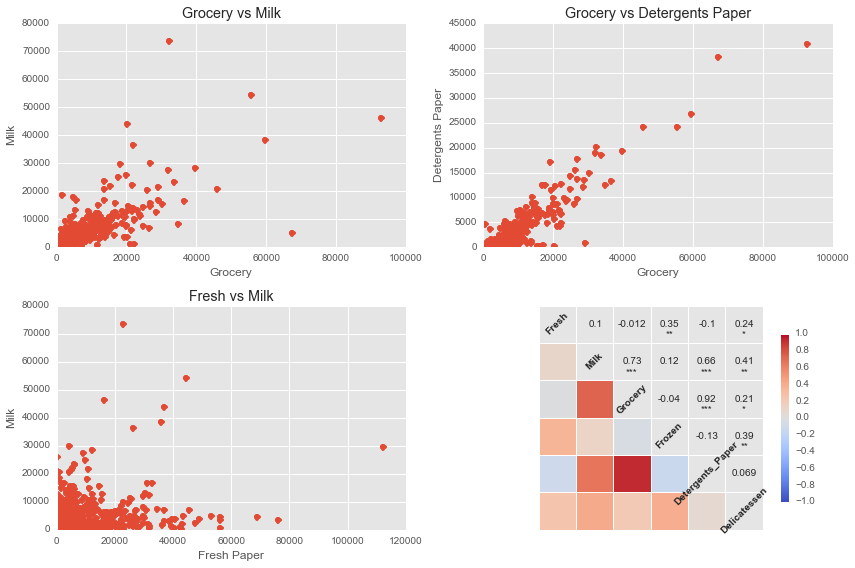

In [2]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(data.Grocery, data.Milk, 'o')
plt.title('Grocery vs Milk')
plt.xlabel('Grocery')
plt.ylabel('Milk')

plt.subplot(2,2,2)
plt.plot(data.Grocery, data.Detergents_Paper, 'o')
plt.title('Grocery vs Detergents Paper')
plt.xlabel('Grocery')
plt.ylabel('Detergents Paper')

plt.subplot(2,2,3)
plt.plot(data.Fresh, data.Milk, 'o')
plt.title('Fresh vs Milk')
plt.xlabel('Fresh Paper')
plt.ylabel('Milk')

plt.subplot(2,2,4)
sns.corrplot(data)

plt.tight_layout()

In [3]:
data.sum(axis=0)

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

In [4]:
for col in data.columns:
    bins = [data[col].min(), data[col].mean(), data[col].max()]
    print col
    print pd.cut(data[col], bins = bins, include_lowest = True).value_counts()
    print '*' * 30

Fresh
[3, 12000.298]         282
(12000.298, 112151]    158
dtype: int64
******************************
Milk
[55, 5796.266]       291
(5796.266, 73498]    149
dtype: int64
******************************
Grocery
[3, 7951.277]        291
(7951.277, 92780]    149
dtype: int64
******************************
Frozen
[25, 3071.932]       313
(3071.932, 60869]    127
dtype: int64
******************************
Detergents_Paper
[3, 2881.493]        303
(2881.493, 40827]    137
dtype: int64
******************************
Delicatessen
[3, 1524.87]        303
(1524.87, 47943]    137
dtype: int64
******************************


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
- PCA 
    - Looking at the features of the data it seems as if there will be some correlations between variables, especially with `Grocery`. Then after describing the data with a correlation plot and a few simple scatterplots, this seems to be the case. Therefore, in result of this, my initial guess was that first PCA dimension should be one very big eigenvector that explains most of the variance, potentially with the combination of `Grocery` with that some of `Detergents_Paper` and `Milk`, however with this un-normalized data and looking at the individual column sums; the feature `Fresh`, could possible take most of the variance of of the data combined with some correlation with `Frozen`. Therefore, by just looking at the sums and correlations between features, there could possibly be two dominate PCA dimensions. 
- ICA 
    - For Independent Component Analysis if we use all of the features, it will be a 6 x 6 matrix with 6 vectors, one for each variable. Each of these new vector-values will be uniquely encoded containing the activity of each independent component. All the components will be statistically independent with each vector will being a linear combination of the features that represent that feature. In regards to a grocery data set like this one, the independent components could be a unique set of different grocery products. Therefore, each vector could represent and consist of a unique group of independant products wholesale customers are purchasing.

### PCA

In [5]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = data.shape[1]).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print 'pca.components_'
print data.columns
print pca.components_
print 'explained_variance_ratio_'
print pca.explained_variance_ratio_

pca.components_
Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
explained_variance_ratio_
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


[ 0.45961362  0.86478588  0.93481597  0.97883941  0.99386152  1.        ]


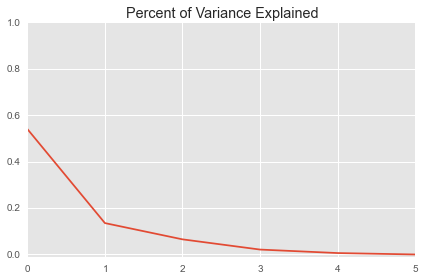

In [6]:
x = np.arange(6)

plt.plot(x, 1 - np.cumsum(pca.explained_variance_ratio_), '-')
plt.title('Percent of Variance Explained')
plt.ylim(-0.01, 1.0)
plt.tight_layout()
print np.cumsum(pca.explained_variance_ratio_)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: Looking at the explained variance ratio and the created graph, the variance drops off significantly after the first two principal components, then gradually after that. 

The goal of PCA is to minimize information loss and keep as much of the information as possible, although this dataset with a few amount of features is not typically a stellar use for PCA since the reduction of features is not as extreme. However, in this dataset and based on the graph, I would probably choose 3 PCAs because the graph starts to level out and it retains about 98% of the variance in the data. In a grocery dataset like this, the good thing if I were to chose 3 PCAs, is that the first 3 components in PCA would keep the most important products from the wholesaler that represent most out of the data. On the other hand, only about 2% of the variance is lost with 3 components. And these products that are not as influential in the PCA reduction will become somewhat diminished. 

In my opinion there are really two different ways to determine how many PCAs to choose. (1) One way typical mathematical way to choose the number of dimensions is that you choose the number of dimensions to make sure that something like 99% or 95% of the variance is retained. This can be computed by computing the Average Squared Projection error (distance between x and its projections) divided by the total variation of the data so that this number is <= 0.01, or <= 0.05 respectively, or this can be computed using the SVD instead. (2) The other simplier and intuitive way is to just look at the graph and simply choose the component where the (elbow) variance levels off for cases like this. 
*Machine Learning* by Andrew Ng

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions in Principle Component Analysis represent the combinations of the original features. PCA deals with correlation between variables that create these individual eigenvectors. In this dataset, the feature of `Fresh` incorporates most of the variance in the first component with some variance coming from the `Frozen` and `Milk` features. The second component is the combination `Grocery` with that some of `Detergents_Paper` and `Milk`. These principal components display the most relevant features of the data and which features capture the most variance (spread of the data distribution). 

Therefore this information is important because one can use these newly created components instead of the original features to train a classifier, cure the curse of dimensionality, or generate new very influential and concise features for the business. PCA allows the business to determine the true underlying features that represent the data the best as display most influential features by representing them in the first and the second components. Therefore a company can really determine the best and even the worst predictors in the dataset. Also, since our brains have a hard time grasping and visualizing multidimensional axes, one can also use this information to reduce the number of features to a more understandable and workable 2. It is possible to get a little grasp on the data in all the original dimensions, but actually being able to visualize the data can be much more useful especially when explaining your findings to a non-technical audience. 

### ICA

[[ 0.00193353  0.07269131 -0.0551114  -0.00177626  0.01564848 -0.01709774]
 [-0.00381896  0.01683552  0.11515757 -0.00708446 -0.13453889 -0.01617001]
 [ 0.00268221 -0.01400857  0.06012015  0.00205768 -0.00276515 -0.00397392]
 [-0.05028172  0.00632265  0.00582303  0.00329379 -0.00970713  0.00296063]
 [-0.00488626 -0.00162061 -0.00571985 -0.00253488  0.00243508  0.05102437]
 [ 0.01094401  0.00103331 -0.00735911 -0.05411028  0.0026568   0.01678682]]


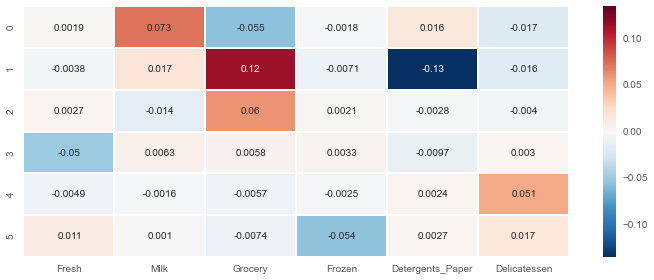

In [7]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

# Normalize components
scaled_data = data.copy()
scaled_data -= scaled_data.mean(axis=0)
scaled_data /= scaled_data.std(axis=0) 

ica = FastICA(n_components = data.shape[1], random_state = 100).fit(scaled_data)

# Print the independent components
print ica.components_
# red or blue are weighted the same, absolute value  
plt.figure(figsize=(10,4))
sns.heatmap(pd.DataFrame(ica.components_, columns= list(data.columns)), annot=True)
plt.tight_layout()

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: Independent components can be derived by minimizing the mutual information and separating the independent components. The created vectors measure the prominence of the observed variables by weighing each component differently and using linear combinations to simply separate the components. The first component in ICA from this dataset consists mostly of `Milk` and `Grocery`, the second consisting of mostly `Grocery` and `Detergents_Paper`, the third isn't as high with `Grocery` and `Milk`, and the fourth coming mostly from `Fresh`. These components can be interpreted as: as the *absolute value* of the elements of the unmixing matrix increases, the corresponding feature has a strong effect on that components. 

These components can be used to separate features into new concise features or projections that are statistically independent of one another. These components could be used for a classification problem or information retrieval like segmenting clients to determine behavior and the business can then look at the effects on these different segmentations independently. In the current dataset, ICA can help a wholesaler determine which unique and independent products customers are purchasing. This can be used by the wholesaler focus on products, have enough inventory and keep track of independent purchasing needs. ICA can be great for a grocery business as the business can truly understand the combinations of the types of grocery the customers are buying.

*Comparing patterns of component loadings: Principal Component Analysis (PCA) versus Independent Component Analysis (ICA) in analyzing multivariate non-normal data* by Donghoh Kim and Se-Kang Kim


## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: Both K Means and Gaussian Mixture Models are highly powerful algorithms and work with mean of data.
- K Means 
    - The best advantage in my opinion is that K-means is very simple in terms of implementation and runtime. 
    - Fastest algorithm for learning mixture models - *SKLEARN*	
    - Gives discrete answers 
    - Usually gives tight clusters
-  Gaussian Mixture Models (expectation-maximization)
    - Works on soft clustering, doesn't have to 100% choose one or another cluster
    - Uses more of a bayesian approach, as it works on probabilities and probability distributions to assign cluster centers by computing how likely the data would come from the means of the clusters, ie. gaussian.
    - Works on boundaries, and assigns intermediate probabilities around 0.5 to points in the middle of decision boundary, which is nice because we get probabilities and and not yes / no answers because there is always some underlying chance the the point could be from the other gaussian (cluster).
    - Maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply. *SKLEARN*

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [8]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [9]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components = 2).fit_transform(scaled_data) # should use mean normalized data for PCA
print reduced_data[:10]  # print upto 10 elements

[[-0.19307077  0.30475306]
 [-0.43392596  0.32803921]
 [-0.81022096 -0.81416893]
 [ 0.7777625  -0.65201155]
 [-0.16609819 -1.26998809]
 [ 0.15599237  0.29480541]
 [ 0.33490718  0.52440632]
 [-0.14042659  0.23073005]
 [ 0.51673134  0.65861312]
 [-1.59029884  0.74016879]]


In [10]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

# clusters = GMM(n_components = 2, random_state = 100).fit(reduced_data)
# clusters3 = GMM(n_components = 3, random_state = 100).fit(reduced_data)
clusters = KMeans(n_clusters = 2, random_state=100).fit(reduced_data)
clusters3 = KMeans(n_clusters = 3, random_state=100).fit(reduced_data)
clusters4 = KMeans(n_clusters = 4, random_state=100).fit(reduced_data)

print clusters
print '*' * 70
print clusters3
print '*' * 70
print clusters4

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=100, tol=0.0001,
    verbose=0)
**********************************************************************
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=100, tol=0.0001,
    verbose=0)
**********************************************************************
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=100, tol=0.0001,
    verbose=0)


In [11]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
# 2 clusters
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
# 3 cluster
Z3 = clusters3.predict(np.c_[xx.ravel(), yy.ravel()])
# 4 cluster
Z4 = clusters4.predict(np.c_[xx.ravel(), yy.ravel()])

In [12]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

# centroids = clusters.means_
# centroids3 = clusters4.means_
centroids = clusters.cluster_centers_
centroids3 = clusters3.cluster_centers_
centroids4 = clusters4.cluster_centers_
print centroids
print '*' * 30
print centroids3
print '*' * 30
print centroids4

[[ 0.41811333 -0.04637285]
 [-3.67010589  0.40705053]]
******************************
[[ -3.52377169   0.92834028]
 [  0.42893083  -0.02737687]
 [ -4.50795382 -10.02928697]]
******************************
[[ -7.04226309   0.63562646]
 [  0.68390594  -0.15602615]
 [ -4.50795382 -10.02928697]
 [ -1.29980866   0.73073732]]


In [13]:
def PCA_plot(Z, centroids):
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
def sample_clusters(clusters, n):
    samples = np.random.choice(clusters.labels_, size = n)
    sns.barplot(samples)
    plt.title('Sample Distribution from Clusters')
    plt.xlabel('Cluster Number')
    plt.ylabel('Freq')
    plt.tight_layout()
    

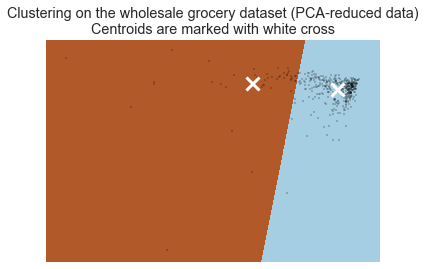

In [14]:
# 2 Clusters
PCA_plot(Z, centroids)

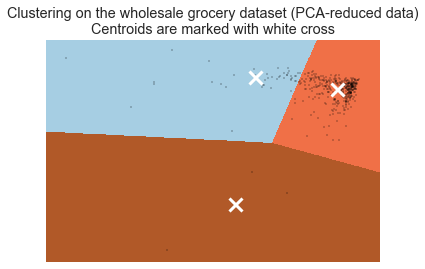

In [15]:
# 3 Clusters
PCA_plot(Z3, centroids3)

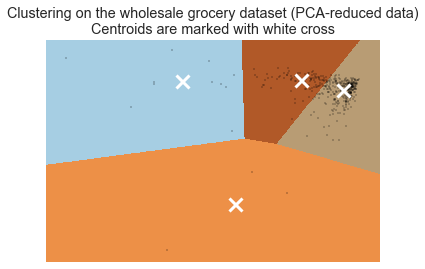

In [16]:
# 4 Clusters
PCA_plot(Z4, centroids4)

##### Sample Clusters

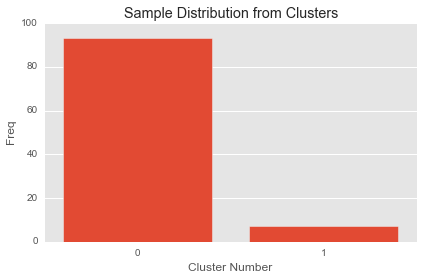

In [17]:
# sample 100 customers with 2 clusters
sample_clusters(clusters, 100)

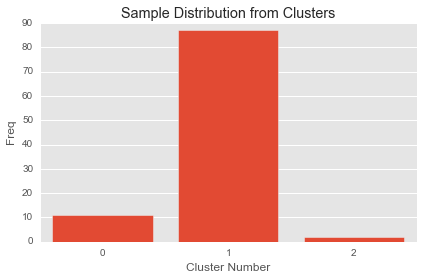

In [18]:
# sample 100 customers with 3 clusters
sample_clusters(clusters3, 100)

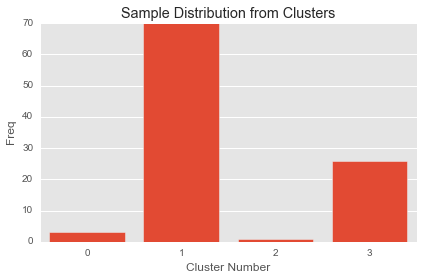

In [20]:
# sample 100 customers with 4 clusters
sample_clusters(clusters4, 100)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: In the 2 component clusters in this dataset, the central objects can be classified into two distinct clusters, or groups of customers: (1) highest volume customers. (2) smaller family run shop customers. The white 'X' represents the mean or the typical customer for each group. The image represents this as the small family run shop customers are all grouped closely together with low variation and the rest of the feature space includes the high volume customers. By using principal component analysis and clustering this becomes even more obvious than it did than with initial EDA. In the random sampling, the 2 cluster groups represent the data well, as the barplot of the distribution mimic the distribution of the cluster center image as the smaller run business (cluster 0) is much higher than than the higher volume customers.

In the 3 component clusters, the central objects do not make a well defined distinguishable split like they did in the two cluster model. If the wholesaler were to use this approach they can classified their customers into small, medium and large. Contrasting 3 clusters with the 2 clusters visualization, the smaller family run shop customers and the highest volume customers are basically split in half creating a new medium sized group. Looking at the barplot of samples the 3 group cluster is highly uneven as mostly all the samples are coming from the small business grouping, with a little coming from the medium sized group and very few from the large group. Even sometimes when one runs this random sampling, one may not get any customers from the large sized group as they are so unbalanced. 

In the 4 component clusters, the central objects are a little less unique. If one compares this approach to the 3 cluster approach, the smaller, low variation customers are divided into two new clusters. Which makes sense, as this grouping is where most of the wholesalers customers fall. With the high amount of data points, if k-means finds its way with two centroids within that group they will inevitably split that data. The issue here with using this many clusters, is that two of the cluster have much more customers than the other two. It also doesn't really make sense to split up a tightly knit cluster here. This can also be explained by the sampling of the 4 cluster groups. It matches the visualization and most are coming from the two low variation clusters of the small family groups. And with this, there are very few if any coming from the other two groups but the samples match the cluster distributions.

While using more than 3 clusters will help the wholesaler identify more groups of different customers, this may not be ideal. In my opinion the best number of clusters is 2, however I can also understand choosing 3. In a dataset like this, I think it is more relevant to use a two or three cluster algorithm as it seems reasonable for there to be two or three groups by either splitting their customers up into the highest volume customers and smaller family run shop customers, or small, medium and large sized customers. Although it is not up to me and depending on how many groups of customers the wholesaler would like, they can chose as they wish. But my opinion is that 2 seems better distributed for this data and from the samples of random customers it is obvious that there is not an even split between the clusters, but it would be best with 2 clusters.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: The technique that gives the most insight into this particular dataset is *Clustering* using K Means or Gaussian Mixture Models. Because this dataset only had 6 features it is not as hard and not as powerful to use PCA as one can easily look at each column independently, although if the dataset consisted of more features, ie. 50 or more, PCA might be more suitable for this answer. 

Clustering can be a very important aspect in market segmentation as determining the different types of customers can be very beneficial. Even Though one can determine that the data could be categorized into two groups using simple EDA by plotting multiple graphs, the tough part in regards to clustering is determining the true cutoff between where one group begins and the other ends, which is where Gaussian Mixture Models excel. And in an even more tedious task it would be to very hard to find clusters if the business needed to increase the number of clusters to 3 or more, as there is not a simple cutoff point between groups in this dataset. This clustering makes market segmentation much simpler and can give concrete answers and guide a business by segmenting their customers.   

**9)** How would you use that technique to help the company design new experiments?

Answer: This wholesaler can now use these formed clusters or any other clustering approach for many new strategies and business ideas. They can run additional experiments, A/B tests, and easily determine how the experiment effects each group and can work on keeping both groups happier. To improve a test, the business needs to try and keep all else fixed and only vary one variable at a time to truely get an unbiased result. The business could also apply clustering with more groupings if the business wanted to segment their customer base further and get small, medium, large volume customers. Or they use clustering to help them focus not only on the entire dataset of customers at one single time, but now the business can pinpoint a lacking group and offer ways to increase productivity or keep customers happy. The business could even cluster one of the clusters to get stratified clusters of one segmentation. 

This technique can also help the company design new experiments and use clustering on other aspects of business and not solely on their customer base. The wholesaler could use clustering within their internal business and determine which departments can be combined to reduce overhead costs and thus make the internals more efficient. Clustering can also be used in how they group certain kinds of food. The business can determine what foods sell well together and keep them together to make more profit or keep customers even happier. There are many ways to use clustering in a business.

**10)** How would you use that data to help you predict future customer needs?

Answer: The wholesale distributor can now easily use this data to help predict future customer needs by categorizing their customers into one of these two clusters. Because the two individual clusters of customers will typically have different needs and demands, the wholesaler can then do analysis on their new delivery method based on the customer's volume or any other new method they decide to incorporate within their business. For the future, by having customers split into two distinct categories, the wholesaler can determine if any other plan will affect both audiences or just a single one and can now easily determine this. Also they can do a mixture of delivery method for each type of customer. ie. for highest volume customers had an easy time adapting to the change, keep the cheap, late delivery, and revert back to the old, regular morning delivery for the smaller family run shops who had serious issues with the new method. Therefore, they can reduce the amount of complaints about future changes and potentially losing customers.

This data, with PCA, also reveals important aspect of the data as well. The business gets to understand and see the most important features in the dataset, which can be very beneficial for the future as they can allocate more time and money to those features. The PCA components will find correlations between separate aspects of their business and combine these features into single features that represent the data well. PCA allows the company to just plug their trackables into PCA and PCA will determine the true underlying features that represent the data best and the worst and what they need to prioritize. 